In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import pprint
import math
from sklearn.datasets import make_blobs

In [2]:
class SVM_STOCH():

    def __init__(self, lambda1 = 4):

        self.lam = lambda1
        
        self.margin = 0            # Will be the margin only on ONE side
        self.total_margin = 0      # Covers the entire distance between margin lines.
        
        self.weights = np.zeros(3) # inital weights here is [0,0,0]
        self.weight_updates = []   # Array of all updated weight vectors
        self.line_found = {
            "linespace": [],
            "Y_values": []
            
        }
        
        self.predictions = {       #Labeled predictions divided by line found.
            -1:[],
             1:[]
        }
        
        self.line = []             # Store the linespace and Y values
        
        self.weights[0] = 1 #inital weights here is [1,0,0]

    def train(self, X, Y, iterations):
        
        X = np.hstack((X,np.ones((X.shape[0],1))))
        
        num_S = len(Y)
        
        for i in range(iterations):
            
            it = random.randint(0, num_S-1)
            step = 1/(self.lam*(i+1)) 
            
            decision = Y[it] *self.weights @ X[it].T
            
            if decision < 1:
                self.weights = (1 - step * self.lam) * self.weights + step*Y[it]*X[it]
            else:
                self.weights = (1 - step * self.lam) * self.weights
                
            self.weight_updates.append(self.weights)
            #Storing each individual update here.
            
            if np.linalg.norm(self.weights) != 0:
                self.total_margin = 2 / np.linalg.norm(self.weights)
                self.margin = 1 / np.linalg.norm(self.weights)
            
        return self.weights
                
            
    def plot(self, X, Y, show_ex_line=False, title="Graph", linearly_separable=None):
        #use the parameter "linearly_separable" if you want to show the
        #linearly separable or non-linearly separable line from our first project
        #by entering either True of false when calling the plot function.
                
        #group for plotting
        df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
        names = {-1:'Label: -1', 1:'Label: 1'}
        colors = {-1:'r', 1:'g'}
        grouped = df.groupby('label')

        #plot settings and labels
        fig = plt.figure(figsize=(13,9))
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title(title, fontsize=20)

        #plot the data and example line
        for key, group in grouped:
            ax.scatter(group.x, group.y, label=names[key], color=colors[key],s=75)
            
        if show_ex_line:
            #Graphing just the perceptron's line.
            perceptron_x = np.linspace(-1,8,100)
            
            if linearly_separable:
                perceptron_y = 0.4844639019003475*perceptron_x -2.426163461674154
            else:
                perceptron_y = -0.3487906127206225 *perceptron_x + 2.8173006454791834
                
            ax.plot(perceptron_x, perceptron_y, color="purple", label='Perceptron\'s Line',linewidth=4)
        else:
            #Graph the perceptron's line and the line found by the SVM
            
            found_line_x = np.linspace(-5,8,100)
            found_line_y = self.weights[0] * found_line_x + self.weights[2]
            line_margin1 = self.weights[0] * found_line_x + (self.weights[2] + self.margin)
            line_margin2 = self.weights[0] * found_line_x + (self.weights[2] - self.margin)
                
            self.line_found["linespace"] = found_line_x
            self.line_found["Y_values"] = found_line_y
            
            # Storing the line itself.
            for i in range(len(found_line_x)):
                self.line.append( [found_line_x[i], self.weights[0] * found_line_x[i] + self.weights[2]])
                
            ax.plot(found_line_x, found_line_y, color="b", label='found line',linewidth=4)
            ax.plot(found_line_x, line_margin1,"m--", label='found line margin1',linewidth=4)
            ax.plot(found_line_x, line_margin2,"m--", label='found line margin2',linewidth=4)


        ax.legend(markerscale=1,fontsize="x-large")
        plt.show()
        
        
    def predict(self, test_set):
        #For the test data
        is_above = lambda p,a,b: np.cross(p-a, b-a) < 0
        #Using cross product to check whether the point is above or below
        # Our line found by the SVM
        
        #Configuring the plot
        colors = ["red", "green"]
        fig = plt.figure(figsize=(13,9))
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title("SVM Predictions", fontsize=20)
        

        
        #Plotting predictions and storing them in the dictionary
        for i in range(len(test_set)):
            if is_above(np.array(test_set[i]), np.array(self.line[0]), np.array(self.line[len(test_set) -1])):
                plt.scatter(test_set[i][0], test_set[i][1], c=colors[0],s=75)
                self.predictions[-1].append(test_set[i])
            else:
                plt.scatter(test_set[i][0], test_set[i][1], c=colors[1],s=75)
                self.predictions[1].append(test_set[i])
        
        
        line_margin1 = self.weights[0] * self.line_found["linespace"] + (self.weights[2] + self.margin)
        line_margin2 = self.weights[0] * self.line_found["linespace"] + (self.weights[2] - self.margin)
        ax.plot(self.line_found["linespace"], line_margin1,"m--", label='found line margin1',linewidth=4)
        ax.plot(self.line_found["linespace"], line_margin2,"m--", label='found line margin2',linewidth=4)
        ax.plot(self.line_found["linespace"], self.line_found["Y_values"], color="b", linewidth=4)        
        
        plt.plot()
        

In [3]:
def get_test_points():
    # Simply returns 30 random test points in the form [[x1,y1]...[xn,yn]]
    # Modified the way I created the test set since every run is random
    # I wanted to keep them in the linespace I had already been working with
    lowery, uppery = -4, 6
    lowerx, upperx = -4, 6

    x = [random.randrange(start= lowerx, stop= upperx) * random.random() for i in range(30)]
    y = [random.randrange(start=lowery, stop = uppery) for x in x]

    test_points = []
    for i in range(30):
        test_points.append([x[i], y[i]])
        
    return test_points

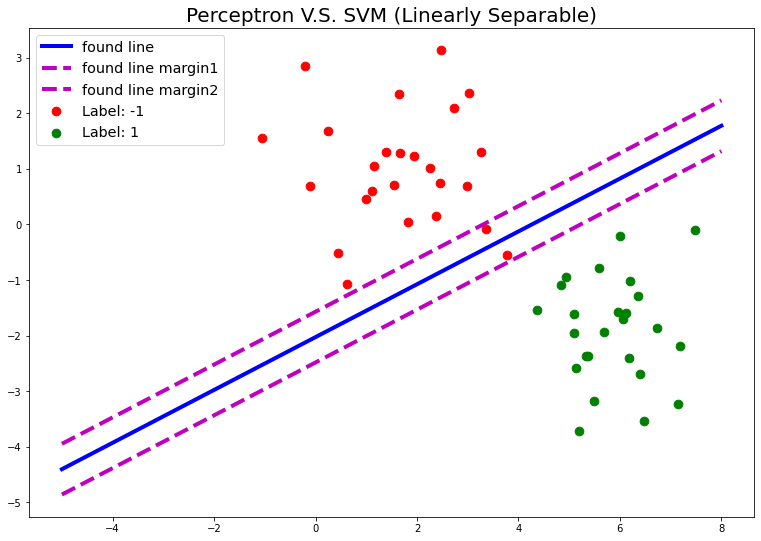

In [4]:
## CASE 1 TRAINING POINTS ARE LINEARLY SEPARABLE.
X, Y = make_blobs(n_samples = 50,
                  centers=([ 1.5, 0.9 ], [6, -2] ),
                  n_features=2,
                  random_state=0)

for idx, item in enumerate(Y):
    if item == 0:
        Y[idx] = -1


# I found these numbers give me the best results!
svm_model = SVM_STOCH(0.01)
svm_model.train(X,Y, 100000)
svm_model.plot(X,Y, False, "Perceptron V.S. SVM (Linearly Separable)", True)

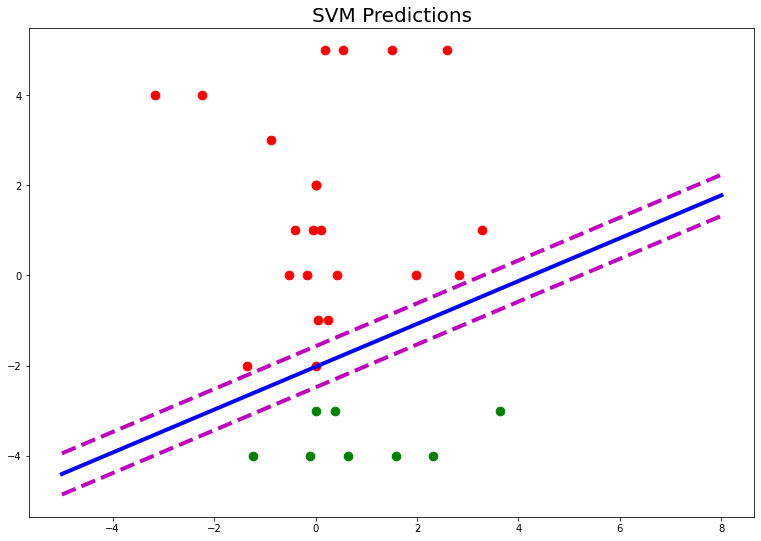

In [5]:
test_points = get_test_points() #function created to simplyfy code.
svm_model.predict(test_points)

In [6]:
# Dispay the predictions like this.

print("Our predictions for the test set are: ")
pprint.pprint(svm_model.predictions)

Our predictions for the test set are: 
{-1: [[-2.238572648255399, 4],
      [1.9807452845583988, 0],
      [-0.5157183492340192, 0],
      [0.018049418627569813, 2],
      [0.0, -2],
      [0.42715413312032213, 0],
      [2.5939601063862288, 5],
      [-0.044780944582523574, 1],
      [-0.4087556629200537, 1],
      [0.24009351838231474, -1],
      [0.17677398456308335, 5],
      [-3.15710404511131, 4],
      [0.5437481339221928, 5],
      [-0.16157085904283597, 0],
      [1.5153269276911516, 5],
      [3.289995628663112, 1],
      [-0.887266505794837, 3],
      [0.0, 2],
      [0.11066733023739994, 1],
      [0.041242531446255004, -1],
      [-1.355983403976401, -2],
      [2.83440709643172, 0]],
 1: [[0.0, -3],
     [-0.10431304310729739, -4],
     [1.5846305964038503, -4],
     [3.6301183282289062, -3],
     [-1.2302016264545608, -4],
     [0.6339686513134085, -4],
     [2.3149814683500707, -4],
     [0.3889339048156093, -3]]}


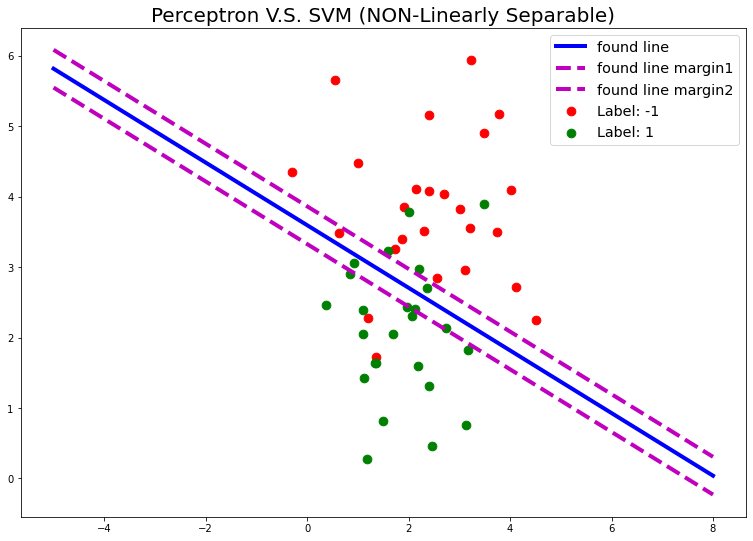

In [7]:
###################### Section for the non-linearly separable case #################
#NOTE That we need to use the same data from our project one
#Here is the non-linearly separable data we used:
X, Y = make_blobs(n_samples = 50, 
                             centers = ([2.25, 3.7], [2, 2]),  # We just need to move these points closer together.
                             random_state = 0)

for idx, item in enumerate(Y):
    if item == 0:
        Y[idx] = -1


# Retrain the model on the non linearly separable data.
svm_model = SVM_STOCH(0.01)
svm_model.train(X,Y, 10100)
svm_model.plot(X,Y, False, "Perceptron V.S. SVM (NON-Linearly Separable)", False) #Last param is true to show which case.

In [8]:
# The SVM Seems to balance the data much nicer since it uses margins!!
# This is exactly what we were looking for.

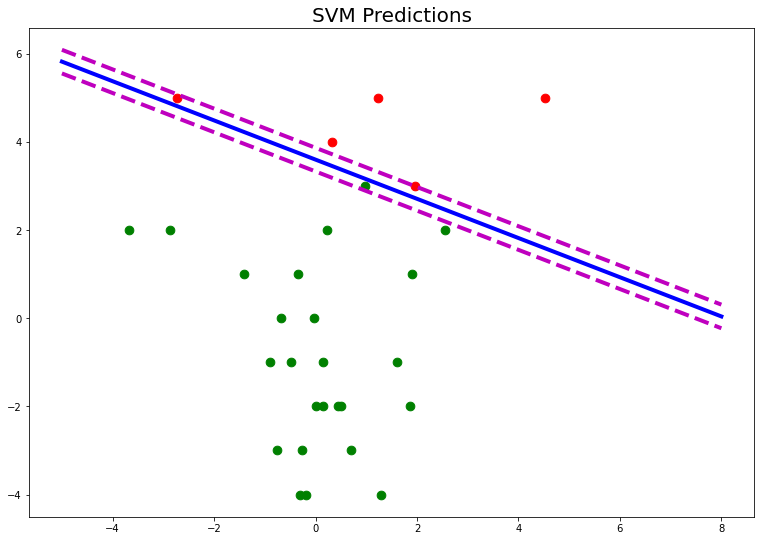

In [9]:
test_points = get_test_points()
svm_model.predict(test_points)

In [11]:
# This is how you can see the margin width I found.
print("total margin width: ", svm_model.total_margin)

total margin width:  0.5357240367067146
